Importing Libraries and Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [3]:
car_dataset = pd.read_csv("Dataset/car data.csv")

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


The above selling price is in Lakhs and the currency is Indian Rupees (INR)

In [6]:
car_dataset.shape

(301, 9)

Dataset Information

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Finding Missing Values in Data

In [8]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking Categories of Data

In [10]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting into Target Variables (X and Y)

In [14]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [15]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Testing Data

In [24]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.1, random_state=2)

Model Training

1) Linear Regression  Model

In [ ]:
Linear_Regression_Model = LinearRegression()

In [26]:
Linear_Regression_Model.fit(X_Train, Y_Train)

LinearRegression()

Evaluating the Linear Regression Model

On Training Data

In [28]:
training_data_prediction = Linear_Regression_Model.predict(X_Train)

R Squared Error on Training Data Prediction

In [32]:
error_score = metrics.r2_score(Y_Train, training_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.8799451660493709


Visualising the Actual Price VS Predicted Price 

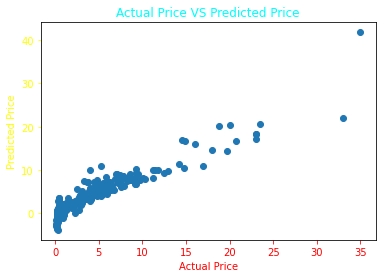

In [58]:
plt.scatter(Y_Train, training_data_prediction)
plt.xlabel("Actual Price", color="Red")
plt.ylabel("Predicted Price", color="Yellow")
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='yellow')
plt.title("Actual Price VS Predicted Price", color = "cyan")
plt.show()

Testing Data Prediction

In [64]:
testing_data_prediction = Linear_Regression_Model.predict(X_Test)

R2 Squared Error on Testing Data Prediction

In [60]:
error_score = metrics.r2_score(Y_Test, testing_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.8365766715026535


Visualising Testing Data Predicted Price vs Actual Price

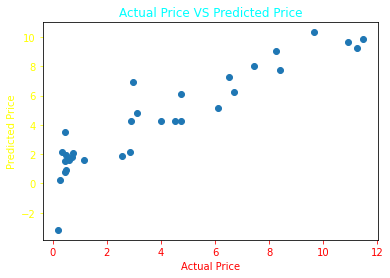

In [61]:
plt.scatter(Y_Test, testing_data_prediction)
plt.xlabel("Actual Price", color="Red")
plt.ylabel("Predicted Price", color="Yellow")
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='yellow')
plt.title("Actual Price VS Predicted Price", color = "cyan")
plt.show()

2) Lasso Regression Model

In [62]:
Lasso_Regression_Model = Lasso()

In [63]:
Lasso_Regression_Model.fit(X_Train, Y_Train)

Lasso()

Evaluating Lasso Regression Model

On Training Data

In [68]:
training_data_prediction_lasso = Lasso_Regression_Model.predict(X_Train)

R2 Squared Error on Training Data Prediction

In [72]:
error_score = metrics.r2_score(Y_Train, training_data_prediction_lasso)
print("R Squared Error: ",error_score)

R Squared Error:  0.8427856123435794


Visualising the Actual Price VS Predicted Price 

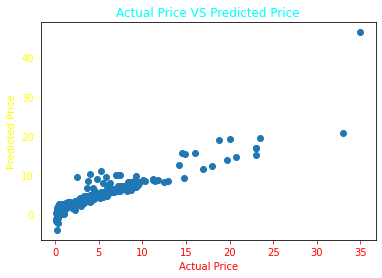

In [73]:
plt.scatter(Y_Train, training_data_prediction_lasso)
plt.xlabel("Actual Price", color="Red")
plt.ylabel("Predicted Price", color="Yellow")
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='yellow')
plt.title("Actual Price VS Predicted Price", color = "cyan")
plt.show()

Testing Data Prediction

In [74]:
testing_data_prediction_lasso = Lasso_Regression_Model.predict(X_Test)

R2 Squared Error on Testing Data Prediction

In [75]:
error_score = metrics.r2_score(Y_Test, testing_data_prediction_lasso)
print("R Squared Error: ",error_score)

R Squared Error:  0.8709167941173195


Visualising the Testing Data Actual Price VS Predicted Price 

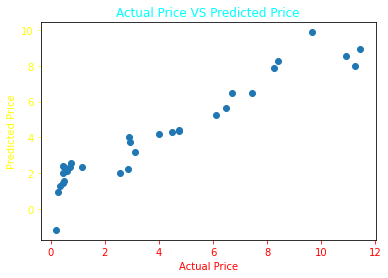

In [76]:
plt.scatter(Y_Test, testing_data_prediction_lasso)
plt.xlabel("Actual Price", color="Red")
plt.ylabel("Predicted Price", color="Yellow")
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='yellow')
plt.title("Actual Price VS Predicted Price", color = "cyan")
plt.show()